In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
print("hello world")

hello world


In [4]:
from sklearn.model_selection import train_test_split
vector = np.vectorize(np.float64)
df = pd.read_csv('FTIR_data.csv')
classData=df.loc[1931:].values.tolist()
classData=classData[1:]
encodeClassdata = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ]
encodeClassdata = np.array(encodeClassdata)

labelHeader = df['Raman'].to_list()
vector = np.vectorize(np.float64)
labels = df['Raman']
lab = labels[0:1931]

lables = vector(lab)
PCA_dat = df[0:1931]

PCA_dat = PCA_dat.iloc[:, 1:]
Input = np.asarray(PCA_dat)
Input.shape, encodeClassdata.shape
Input_T = Input.T

X_train, X_test, y_train, y_test = train_test_split(Input_T, encodeClassdata,test_size=0.2, random_state=42)

PCA_dat.head
Input.shape, encodeClassdata.shape
Input_T
X_train.shape
labels


0        400.6888
1        402.5525
2        404.4162
3        406.2798
4        408.1435
          ...    
1927    3991.9788
1928    3993.8425
1929    3995.7062
1930    3997.5698
1931       Result
Name: Raman, Length: 1932, dtype: object

In [8]:
import sklearn.decomposition
pca=sklearn.decomposition.PCA(n_components=48)


In [9]:
pca.fit(X_train)
PCAmat = pca.transform(X_train)
PCAmat_X1_test=pca.transform(X_test)
X_train.shape
count_row = X_train.shape[0]
X_train.shape
PCAmat[3].shape

(48,)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Load the data
df = pd.read_csv('FTIR_data.csv')

# Extract the class labels
encodeClassdata = np.array([0] * 30 + [1] * 30)

# Extract the spectral data
PCA_dat = df.iloc[:60, 1:].astype(np.float64).values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(PCA_dat, encodeClassdata, test_size=0.2, random_state=42)

# Perform PLS-DA classification
pls = PLSRegression(n_components=48)
pls.fit(X_train, y_train)

# Predict the class labels
y_pred_train = np.round(pls.predict(X_train)).astype(int)
y_pred_test = np.round(pls.predict(X_test)).astype(int)

# Calculate the training and test accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print the accuracy
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)



Training Accuracy: 0.0
Test Accuracy: 0.0


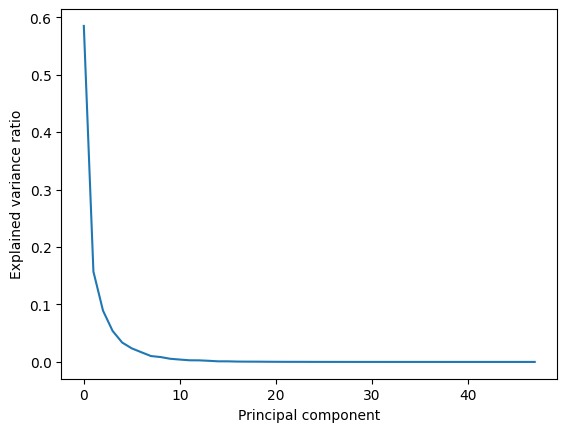

[[4.18416060e-03 6.45576322e-05 7.08295888e-02 ... 1.61551586e-03
  1.51746596e-04 2.46447588e-02]
 [2.72484145e-02 5.62278918e-02 4.56355402e-02 ... 2.29205285e-02
  2.02702511e-08 8.67114103e-02]
 [1.58099409e-02 2.13832044e-02 2.12288619e-03 ... 4.06753745e-03
  8.97015926e-04 6.38966944e-05]
 ...
 [4.62168528e-03 1.37927415e-01 7.57658376e-02 ... 1.07266594e-29
  4.93038066e-32 2.02176422e-29]
 [3.80963832e-04 1.05335158e-01 5.40765895e-03 ... 1.50992908e-29
  5.56593754e-32 1.61970708e-29]
 [1.27340271e-05 5.64469098e-04 5.67901230e-05 ... 4.07526776e-31
  1.56000325e-32 2.92933945e-31]]


In [28]:

pca.fit(X_train)
PCAmat_1 = pca.transform(X_train)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal component')
plt.ylabel('Explained variance ratio')
plt.show()

# Calculate the variances of the principal components
variances = np.square(pca.components_)

# Print the variances of the principal components
print(variances)

#X_train.shape
#count_row = X_train.shape[0]
#X_train.shape


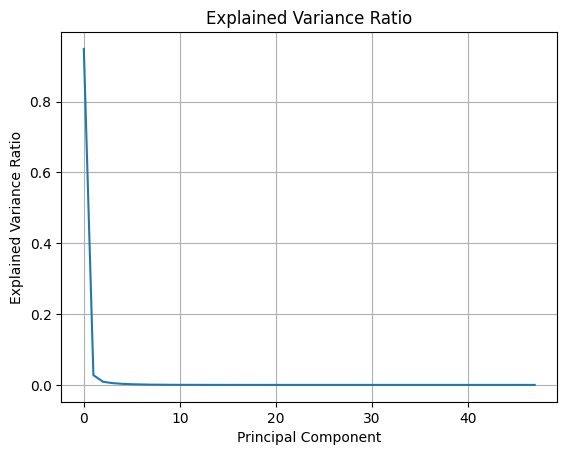

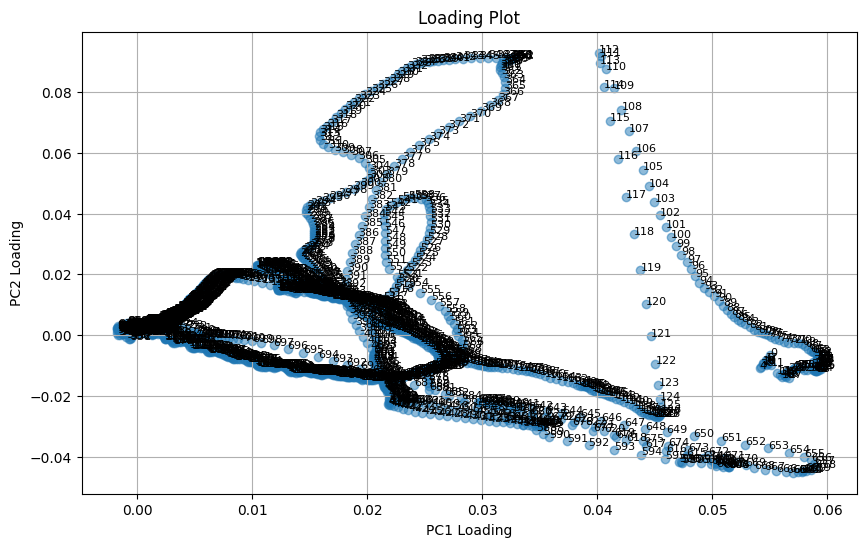

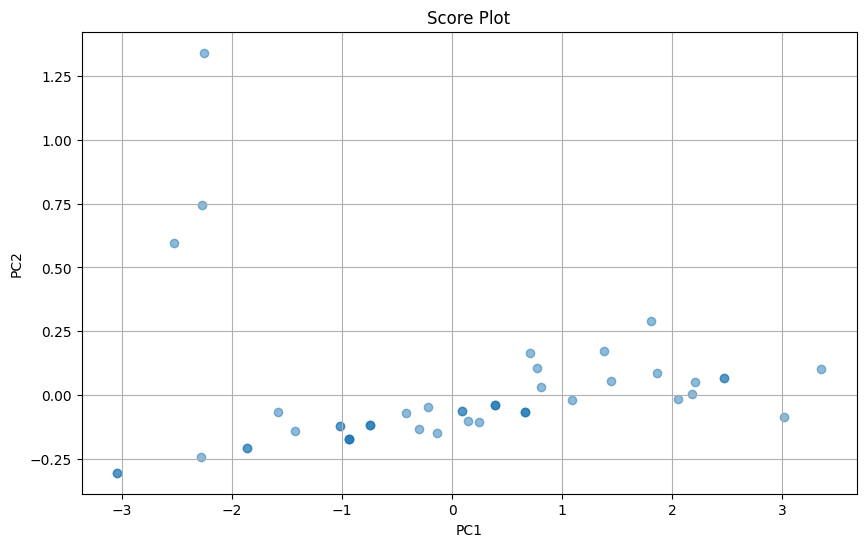

In [49]:


# Plot explained variance ratio
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio')
plt.grid()
plt.show()

# Create a loading plot
loadings = pca.components_.T
num_features = X_train.shape[1]

plt.figure(figsize=(10, 6))
plt.scatter(loadings[:, 0], loadings[:, 1], alpha=0.5)
plt.xlabel('PC1 Loading')
plt.ylabel('PC2 Loading')
plt.title('Loading Plot')

# Add feature indices as annotations to the plot
for i in range(num_features):
    plt.text(loadings[i, 0], loadings[i, 1], str(i), fontsize=8)

plt.grid()
plt.show()

# Create a score plot
plt.figure(figsize=(10, 6))
plt.scatter(PCAmat_1[:, 0], PCAmat_1[:, 1], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Score Plot')
plt.grid()
plt.show()





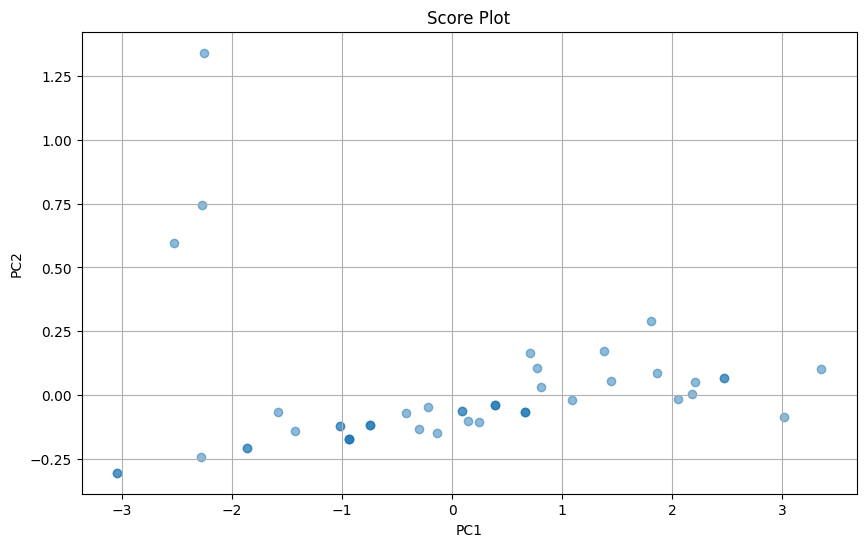

In [50]:
# Create a score plot
plt.figure(figsize=(10, 6))
plt.scatter(PCAmat_1[:, 0], PCAmat_1[:, 1], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Score Plot')
plt.grid()
plt.show()




In [51]:
encodeClassdata = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0,1,1,1, 1, 1, 1, 1,1,1,1,1,1, 1,1,1,1,1,1,1,1,1,1, 1,1,1,1,1,1,1,1]
encodeClassdata = np.array(encodeClassdata)
encodeClassdata.shape

(60,)

In [52]:
vector = np.vectorize(np.float64)
df = pd.read_csv('Raman_Ndata.csv')
classData = df.loc[264, :].values.tolist()
classData = classData[1:]
encodeClassdata = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0,1,1,1, 1, 1, 1, 1,1,1,1,1,1, 1,1,1,1,1,1,1,1,1,1, 1,1,1,1,1,1,1,1]
encodeClassdata = np.array(encodeClassdata)

labelHeader = df['Raman'].to_list()
vector = np.vectorize(np.float64)
labels = df['Raman']
lab = labels[0:264]
#lab
lables = vector(lab)
PCA_dat = df[0:264]
#PCA_dat.head
PCA_dat = PCA_dat.iloc[:, 1:]
Input = np.asarray(PCA_dat)
#Input.shape, encodeClassdata.shape
Input_T = np.transpose(Input)
#Input_T.shape
#classData
X2_train, X2_test, y2_train, y2_test = train_test_split(Input_T, encodeClassdata,test_size=0.2, random_state=42)

count_row = X_train.shape[0]
y2_train.shape

(48,)

In [53]:
pca.fit(X2_train)
PCAmat_2 = pca.transform(X2_train)
PCAmat_X2_test=pca.transform(X2_test)

X2_train.shape
count_row = X2_train.shape[0]
#X2_train.shape
#PCAmat_2.shape
y2_train.shape

(48,)

In [54]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

def feature_selection(X_train_source1, X_train_source2, y_train):
    # Select the top 5 features from each source using SelectKBest.
    selector_source1 = SelectKBest(score_func=f_classif, k=30)
    selector_source2 = SelectKBest(score_func=f_classif, k=30)
    
    X_train_source1 = selector_source1.fit_transform(X_train_source1, y_train)
    X_train_source2 = selector_source2.fit_transform(X_train_source2, y_train)

    # Fuse the selected features from each source.
    X_train_fused = np.concatenate([X_train_source1, X_train_source2], axis=1)

    return X_train_fused

In [55]:
X_train=feature_selection(PCAmat,PCAmat_2,y_train)

In [56]:
X_test=feature_selection(PCAmat_X1_test,PCAmat_X2_test,y_test)

In [57]:
from sklearn.preprocessing import StandardScaler
# Load the data and perform preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [58]:
import numpy as np
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv1D, Dense, Dropout, Flatten,MaxPooling1D, Reshape)
from tensorflow.keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier

# Define the hyperparameters to tune for each model
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [196,312, 128],
    'dropout_rate': [0.3, 0.5, 0.7]
}

# Define the function to create the Keras models
def create_model_1(learning_rate=0.001, dropout_rate=0.5):
    model = Sequential([
        Conv1D(32, 3, activation='relu', padding='same', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(2),
        Conv1D(64, 3, activation='relu', padding='same'),
        MaxPooling1D(2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

def create_model_2(learning_rate=0.001, dropout_rate=0.5):
    model = Sequential([
        Conv1D(32, 3, activation='relu', padding='same', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(2),
        Flatten(),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

def create_model_3(learning_rate=0.001, dropout_rate=0.5):
    model= Sequential([
        Conv1D(32, 3, activation='relu', padding='same', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

def create_model_4(learning_rate=0.001, dropout_rate=0.5):
    model= Sequential([
        Conv1D(32, 3, activation='relu', padding='same', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(2),
        Conv1D(64, 3, activation='relu', padding='same'),
        MaxPooling1D(2),
        Flatten(),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

def create_model_5(learning_rate=0.001, dropout_rate=0.5):
    model = Sequential([
        Conv1D(96, 11, strides=4, activation='relu',input_shape=(X_train.shape[1],1)),
        MaxPooling1D(3, strides=2),
        Conv1D(256, 5, padding='same', activation='relu'),
        MaxPooling1D(3, strides=2),
        Conv1D(384, 3, padding='same', activation='relu'),
        Conv1D(384, 3, padding='same', activation='relu'),
        Conv1D(256, 3, padding='same', activation='relu'),
        MaxPooling1D(3, strides=2),
        Flatten(),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

def create_model_6(learning_rate=0.001, dropout_rate=0.5):
    model = Sequential([
        Conv1D(96, 11, strides=4, activation='relu',input_shape=(X_train.shape[1],1)),
        MaxPooling1D(3, strides=2),
        Conv1D(256, 5, padding='same', activation='relu'),
        MaxPooling1D(3, strides=2),
        Conv1D(384, 3, padding='same', activation='relu'),
        Conv1D(384, 3, padding='same', activation='relu'),
        Conv1D(256, 3, padding='same', activation='relu'),
        MaxPooling1D(3, strides=2),
        Flatten(),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define the models
models = {
    'CNN_4': (KerasClassifier(build_fn=create_model_1), param_grid),
    'CNN_2': (KerasClassifier(build_fn=create_model_2), param_grid),
    'CNN_3': (KerasClassifier(build_fn=create_model_3), param_grid),
    'CNN_3C': (KerasClassifier(build_fn=create_model_4), param_grid),
    'AlexNet':(KerasClassifier(build_fn=create_model_5), param_grid),
    'RSnet':(KerasClassifier(build_fn=create_model_6), param_grid)
}

# Train and evaluate the models
results = {}
roc_curves = []

for model_name, (model, params) in models.items():
    print(f"Training and evaluating {model_name}...")

    grid_search = GridSearchCV(model, params, cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Perform cross-validation
    scores = cross_val_score(best_model, X_train, y_train, cv=5)
    mean_score = np.mean(scores)

    # Get predictions for test set
    y_pred = best_model.predict(X_test)

    # Compute confusion matrix and classification report
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    results[model_name] = {
        'best_params': best_params,
        'mean_cv_score': mean_score,
        'confusion_matrix': cm,
        'classification_report': cr
    }
    
    print(y_test.shape)

    # Predict the probabilities for ROC curve
    y_proba = best_model.predict_proba(X_test)
    y_proba_positive = y_proba[:, 1]  # Use probabilities for the positive class

    fpr, tpr, _ = roc_curve(y_test, y_proba_positive)
    roc_curves.append((fpr, tpr, model_name))

# Plot the ROC curves
plt.figure(figsize=(8, 6))

for fpr, tpr, model_name in roc_curves:
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print the results
for model_name, result in results.items():
    print(f"\n{model_name}:")
    print("Best Parameters:", result['best_params'])
    print("Mean Cross-Validation Score:", result['mean_cv_score'])
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("Classification Report:")
    print(result['classification_report'])


C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py:111: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  'CNN_4': (KerasClassifier(build_fn=create_model_1), param_grid),
C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py:112: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  'CNN_2': (KerasClassifier(build_fn=create_model_2), param_grid),
C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py:113: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  'CNN_3': (KerasClassifier(build_fn=create_model_3), param_grid),
C:\Users\akhil\A

Training and evaluating CNN_4...
1/1 [==============================] - 0s 100ms/step
(12,)
1/1 [==============================] - 0s 28ms/step
Training and evaluating CNN_2...
1/1 [==============================] - 0s 100ms/step


1/1 [==============================] - 0s 82ms/step
(12,)
1/1 [==============================] - 0s 22ms/step
Training and evaluating CNN_3...
1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 82ms/step
(12,)
1/1 [==============================] - 0s 36ms/step
Training and evaluating CNN_3C...
1/1 [==============================] - 0s 182ms/step - loss: 0.6240 - accuracy: 0.5556


1/1 [==============================] - 0s 102ms/step
(12,)
1/1 [==============================] - 0s 36ms/step
Training and evaluating AlexNet...


ValueError: 
All the 81 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2333" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2333/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2333/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2333" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2336" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2336/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2336/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2336" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2339" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2339/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2339/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2339" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2342" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2342/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2342/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2342" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2345" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2345/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2345/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2345" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2348" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2348/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2348/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2348" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2351" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2351/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2351/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2351" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2354" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2354/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2354/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2354" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2357" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2357/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2357/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2357" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2360" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2360/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2360/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2360" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2363" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2363/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2363/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2363" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2366" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2366/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2366/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2366" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2369" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2369/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2369/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2369" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2372" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2372/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2372/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2372" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2375" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2375/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2375/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2375" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2378" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2378/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2378/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2378" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2381" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2381/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2381/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2381" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2384" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2384/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2384/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2384" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2387" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2387/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2387/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2387" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2390" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2390/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2390/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2390" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2393" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2393/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2393/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2393" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2396" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2396/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2396/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2396" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2399" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2399/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2399/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2399" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2402" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2402/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2402/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2402" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2405" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2405/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2405/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2405" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2408" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2408/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2408/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2408" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2411" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2411/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2411/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2411" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2414" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2414/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2414/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2414" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2417" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2417/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2417/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2417" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2420" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2420/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2420/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2420" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2423" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2423/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2423/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2423" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2426" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2426/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2426/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2426" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2429" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2429/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2429/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2429" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2432" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2432/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2432/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2432" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2435" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2435/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2435/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2435" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2438" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2438/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2438/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2438" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2441" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2441/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2441/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2441" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2444" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2444/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2444/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2444" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2447" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2447/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2447/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2447" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2450" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2450/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2450/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2450" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2453" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2453/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2453/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2453" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2456" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2456/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2456/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2456" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2459" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2459/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2459/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2459" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2462" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2462/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2462/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2462" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2465" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2465/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2465/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2465" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2468" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2468/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2468/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2468" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2471" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2471/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2471/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2471" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2474" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2474/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2474/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2474" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2477" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2477/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2477/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2477" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2480" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2480/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2480/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2480" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2483" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2483/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2483/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2483" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2486" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2486/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2486/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2486" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2489" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2489/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2489/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2489" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2492" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2492/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2492/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2492" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2495" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2495/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2495/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2495" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2498" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2498/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2498/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2498" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2501" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2501/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2501/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2501" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2504" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2504/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2504/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2504" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2507" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2507/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2507/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2507" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2510" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2510/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2510/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2510" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2513" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2513/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2513/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2513" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2516" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2516/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2516/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2516" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2519" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2519/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2519/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2519" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2522" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2522/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2522/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2522" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2525" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2525/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2525/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2525" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2528" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2528/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2528/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2528" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2531" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2531/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2531/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2531" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2534" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2534/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2534/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2534" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2537" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2537/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2537/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2537" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2540" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2540/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2540/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2540" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2543" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2543/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2543/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2543" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2546" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2546/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2546/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2546" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2549" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2549/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2549/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2549" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2552" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2552/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2552/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2552" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2555" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2555/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2555/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2555" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2558" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2558/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2558/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2558" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2561" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2561/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2561/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2561" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2564" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2564/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2564/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2564" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2567" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2567/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2567/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2567" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2570" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2570/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2570/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2570" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_41484\595494482.py", line 73, in create_model_5
    model = Sequential([
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_2573" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_2573/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2573/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_2573" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)


In [46]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import (Conv1D, Dense, Dropout, Flatten,MaxPooling1D, Reshape)
from tensorflow.keras.models import Sequential
import keras_tuner as kt
from keras.callbacks import EarlyStopping


def build_model(X_train, y_train):
    """
    Build and compile the model using hyperparameters found through hyperparameter tuning.

    This function performs hyperparameter tuning using Keras Tuner to find the optimal
    hyperparameters for the model. It creates a model with a specified architecture and
    compiles it with the best hyperparameters. The hyperparameter search space includes
    the number of units in the first dense layer and the learning rate for the optimizer.

    Args:
        X_train (numpy.ndarray): Input training data.
        y_train (numpy.ndarray): Target training data.

    Returns:
        keras.models.Sequential: Compiled model with the optimal hyperparameters.
    """
    def model_builder(hp):
        model = keras.Sequential()
        model.add(Conv1D(filters=64, kernel_size=2, activation='relu',
                         input_shape=(X_train.shape[1], 1)))

        # Tune the number of units in the first Dense layer
        hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
        model.add(keras.layers.Dense(units=hp_units, activation='relu'))
        model.add(keras.layers.Dense(10))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Dropout(0.3))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))

        # Tune the learning rate for the optimizer
        hp_learning_rate = hp.Choice(
            'learning_rate', values=[1e-2, 1e-3, 1e-4])

        model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

        return model

    tuner = kt.Hyperband(model_builder,
                         objective='accuracy',
                         max_epochs=50,
                         factor=3,
                         overwrite=True)

    tuner.search(X_train, y_train, epochs=50)

    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

    print(f"""
    The hyperparameter search is complete. The optimal number of units in the first densely-connected
    layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
    is {best_hps.get('learning_rate')}.
    """)

    model = tuner.hypermodel.build(best_hps)
    model.summary()
    #Visualize the model
    keras.utils.plot_model(model, show_shapes=True,show_layer_activations=True)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    # Fit the model with early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[early_stopping])

    plot_history(history)  # Plot accuracy and loss history

    return model

def plot_history(history):
    """
    Plot the accuracy and loss history of a trained model.

    This function takes the training history of a model and creates two plots: one for the
    accuracy and one for the loss. The plots show the training and validation performance
    over the epochs.

    Args:
        history (keras.callbacks.History): Training history of the model.
    """
    plt.figure(figsize=(22, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

Trial 62 Complete [00h 00m 02s]
accuracy: 0.7083333134651184

Best accuracy So Far: 1.0
Total elapsed time: 00h 02m 04s
INFO:tensorflow:Oracle triggered exit

    The hyperparameter search is complete. The optimal number of units in the first densely-connected
    layer is 64 and the optimal learning rate for the optimizer
    is 0.01.
    
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 59, 64)            192       
                                                                 
 dense_3 (Dense)             (None, 59, 64)            4160      
                                                                 
 dense_4 (Dense)             (None, 59, 10)            650       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 29, 10)           0         
 1D)                                     

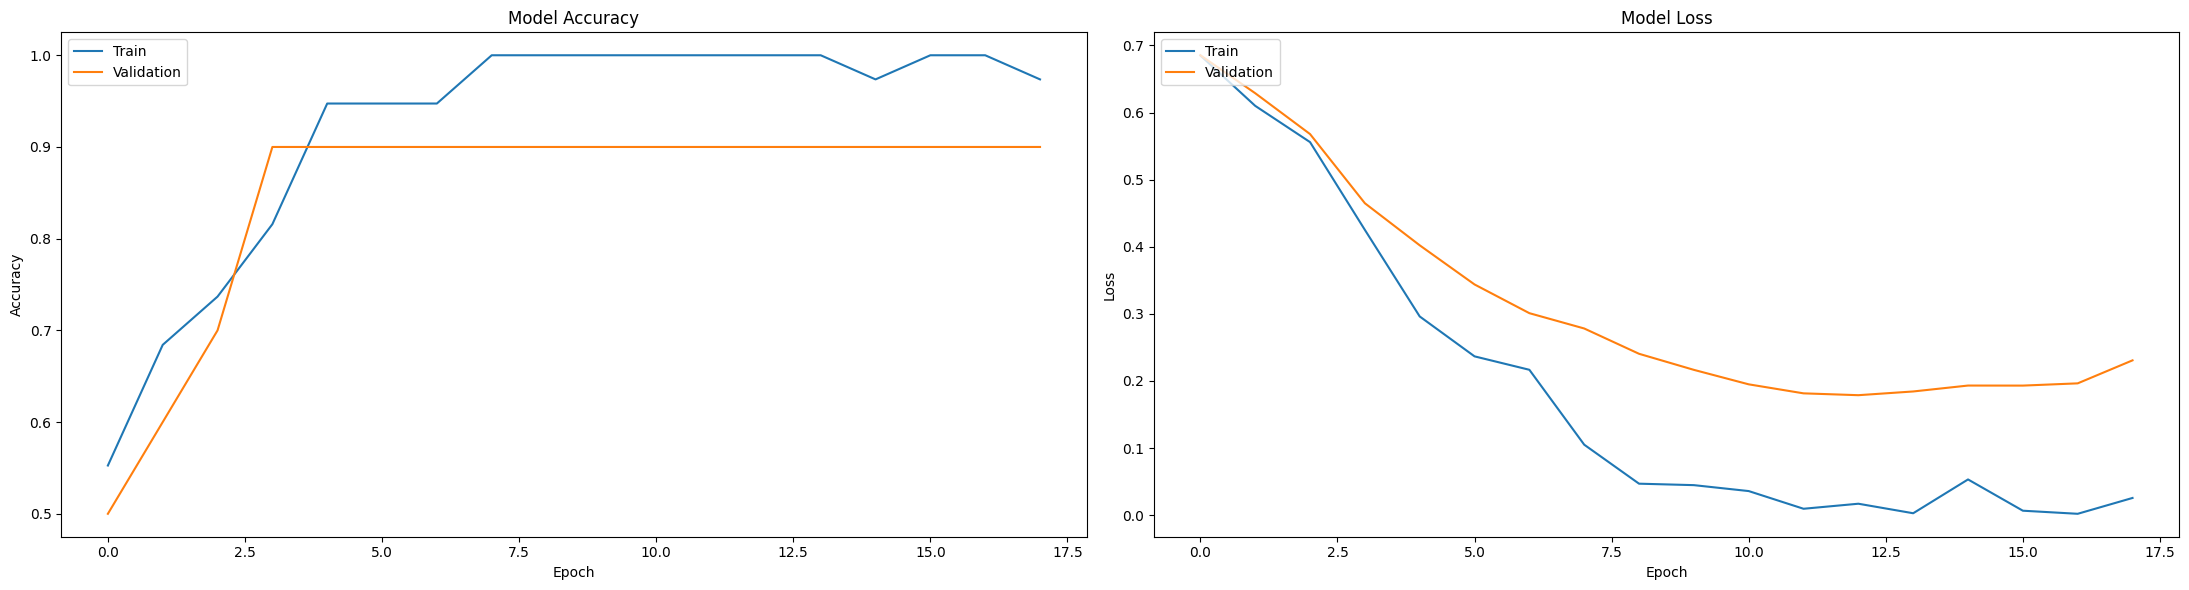

In [47]:
model=build_model(X_train, y_train)

In [48]:
#This is a dump of all my code for Tensorflow. I did not get time to modularize it
#Please mix and match all you need, I'll try my best to document the code
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import tensorflow.keras as keras
import keras_tuner as kt
from operator import mod
import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1" disable gpu if you're poor like me :
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
#import csv
from sklearn.decomposition import PCA
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import keras
import tensorflow as tf
from keras.utils import to_categorical
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from tensorflow.keras.layers import (Concatenate, Conv1D, Dense, Flatten,
                                     Input, MaxPooling1D, Reshape)
from tensorflow.keras.models import Model
from keras.utils.vis_utils import plot_model
from keras.layers import Input, Dense, Conv1D, Flatten, LeakyReLU, MaxPool1D, Concatenate, Dropout, BatchNormalization, Softmax, InputLayer
from keras.models import Sequential, Model
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, MaxPooling1D, Flatten
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# First, apply the followind data transformations to the data:
"""

y_train, y_test=to_categorical(y_train), to_categorical(y_test)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train_new = tf.keras.preprocessing.sequence.pad_sequences(
    y_train, padding="post")

"""


def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Evaluates a Keras model on the test data and returns evaluation metrics.

    Args:
    - model (tensorflow.keras.models.Sequential): The Keras model to be evaluated.
    - trainX (numpy.ndarray): The training data.
    - trainy (numpy.ndarray): The training labels.
    - testX (numpy.ndarray): The test data.
    - testy (numpy.ndarray): The test labels.

    Returns:
    - metrics (dict): A dictionary containing evaluation metrics.
    """

    # Compile model
    model.compile(loss=BinaryCrossentropy(),
                  optimizer=RMSprop(), metrics=['accuracy'])

    # Train model
    model.fit(X_train, y_train, epochs=100)

    # Evaluate model on test data
    y_pred = np.round(model.predict(X_test))
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Return evaluation metrics
    metrics = {'accuracy': accuracy,
               'precision': precision,
               'recall': recall,
               'f1': f1}

    return metrics




def run_experiment(model, trainX, trainy,  testX, testy, repeats, epochs):
    """
    Runs an experiment to evaluate a Keras model on the test data.

    Args:
    - model (tensorflow.keras.models.Sequential): The Keras model to be evaluated.
    - trainX (numpy.ndarray): The training data.
    - trainy (numpy.ndarray): The training labels.
    - testX (numpy.ndarray): The test data.
    - testy (numpy.ndarray): The test labels.
    - repeats (int): The number of times to repeat the experiment.
    - epochs (int): The number of epochs to train the model.

    Returns:
    - scores (list): A list of evaluation metric scores.
    """

    # Repeat experiment
    scores = []
    for r in range(repeats):
        print(f"Running experiment #{r+1}")
        score = evaluate_model(model, trainX, trainy, testX, testy)
        scores.append(score)

    # Summarize results
    summarize_results(scores)

    return scores

def summarize_results(scores):
    """
    Prints out mean and standard deviation of evaluation metrics.

    Args:
    - scores (list): A list of evaluation metric scores.
    """

    mean_accuracy = np.mean([score['accuracy'] for score in scores])
    std_accuracy = np.std([score['accuracy'] for score in scores])

    mean_precision = np.mean([score['precision'] for score in scores])
    std_precision = np.std([score['precision'] for score in scores])

    mean_recall = np.mean([score['recall'] for score in scores])
    std_recall = np.std([score['recall'] for score in scores])

    mean_f1 = np.mean([score['f1'] for score in scores])
    std_f1 = np.std([score['f1'] for score in scores])

    print(f"Accuracy: {mean_accuracy:.3f} (+/-{std_accuracy:.3f})")
    print(f"Precision: {mean_precision:.3f} (+/-{std_precision:.3f})")
    print(f"Recall: {mean_recall:.3f} (+/-{std_recall:.3f})")
    print(f"F1-score: {mean_f1:.3f} (+/-{std_f1:.3f})")



In [49]:
metrics=evaluate_model(model, X_train, y_train, X_test, y_test)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 0.0480 - accuracy: 0.9792
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 0.0693 - accuracy: 0.9583
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0120 - accuracy: 1.0000
Epoch 5/100
2/2 [==============================] - 0s 18ms/step - loss: 0.0154 - accuracy: 1.0000
Epoch 6/100
2/2 [==============================] - 0s 14ms/step - loss: 0.0142 - accuracy: 1.0000
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 0.0121 - accuracy: 1.0000
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 0.0737 - accuracy: 0.9792
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 11/100
2/2 [=======

In [50]:
 scores=run_experiment(model, X_train, y_train,  X_test, y_test, 1, 100)

Running experiment #1
Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 1.5064e-04 - accuracy: 1.0000
Epoch 2/100
2/2 [==============================] - 0s 14ms/step - loss: 1.4111e-04 - accuracy: 1.0000
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 3.0251e-04 - accuracy: 1.0000
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 4.4044e-05 - accuracy: 1.0000
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 2.0628e-05 - accuracy: 1.0000
Epoch 6/100
2/2 [==============================] - 0s 0s/step - loss: 1.2518e-04 - accuracy: 1.0000
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 1.6560e-04 - accuracy: 1.0000
Epoch 8/100
2/2 [==============================] - 0s 0s/step - loss: 2.6921e-05 - accuracy: 1.0000
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 1.0266e-04 - accuracy: 1.0000
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - lo

In [51]:
summarize_results(scores)

Accuracy: 0.667 (+/-0.000)
Precision: 0.667 (+/-0.000)
Recall: 1.000 (+/-0.000)
F1-score: 0.800 (+/-0.000)


1/1 [==============================] - 0s 33ms/step


<Axes: >

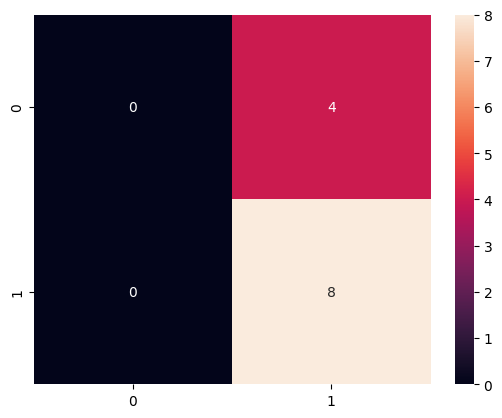

In [52]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

threshold = 0.5  # Adjust the threshold as needed
y_predict_test = model.predict(X_test)
# Apply threshold to convert predicted values to binary
y_binary_predict_test = np.where(y_predict_test > threshold, 1, 0)

cm = confusion_matrix(y_test, y_binary_predict_test)
sns.heatmap(cm, annot=True)


In [50]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.utils import all_estimators
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve
from matplotlib import pyplot


def evaluate_model(classifier, X_train, y_train, X_test, y_test):
    """
    Train and evaluate a classifier on the given training and test data.

    Args:
        classifier: The classifier instance to evaluate.
        X_train (array-like): Training data matrix of shape (n_samples, n_features).
        y_train (array-like): Target values for the training data.
        X_test (array-like): Test data matrix of shape (n_samples, n_features).
        y_test (array-like): Target values for the test data.

    Returns:
        None
    """
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    print("Accuracy:", '{0:.2%}'.format(accuracy_score(y_test, prediction)))
    print("Cross Validation Score:", '{0:.2%}'.format(cross_val_score(
        classifier, X_train, y_train, cv=cv, scoring='roc_auc').mean()))
    print("ROC_AUC Score:", '{0:.2%}'.format(
        roc_auc_score(y_test, prediction)))
    plot_roc_curve(classifier, X_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()


def evaluate_model_classification(classifier, X_test, y_test, colors=['#F93822', '#FDD20E']
):
    """
    Evaluate a classifier on the given test data and display the confusion matrix and classification report.

    Args:
        classifier: The classifier instance to evaluate.
        X_test (array-like): Test data matrix of shape (n_samples, n_features).
        y_test (array-like): Target values for the test data.

    Returns:
        None
    """
    # Confusion Matrix
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value)
                   for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2,
              v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, cmap=colors, fmt='')

    # Classification Report
    print(classification_report(y_test, classifier.predict(X_test)))


def run_functions_on_models(estimators, function1, function2, X_train, y_train, X_test, y_test):
    """
    Run the given functions on every single classifier instance in scikit-learn.

    Args:
        estimators: List of (name, estimator_class) tuples representing the available classifiers.
        function1: The first function to run on each classifier.
        function2: The second function to run on each classifier.
        X_train (array-like): Training data matrix of shape (n_samples, n_features).
        y_train (array-like): Target values for the training data.
        X_test (array-like): Test data matrix of shape (n_samples, n_features).
        y_test (array-like): Target values for the test data.

    Returns:
        None
    """
    for name, estimator_class in estimators:
        try:
            estimator = estimator_class()
            print(
                f"Running {function1.__name__} and {function2.__name__} on {name}...")
            estimator.fit(X_train, y_train)
            function1(estimator, X_train, y_train, X_test, y_test)
            function2(estimator, X_test, y_test)
            print("Completed successfully!")
        except Exception as e:
            print(f"Error encountered while fitting {name}: {str(e)}")
            continue


def visualize_best_models(estimators, X_train, y_train):
    """
    Visualize the performances of the best models using violin plots, box plots, and bar plots.

    Args:
        estimators: List of (name, estimator_class) tuples representing the available classifiers.
        X_train (array-like): Training data matrix of shape (n_samples, n_features).
        y_train (array-like): Target values for the training data.

    Returns:
        None
    """
    # Dictionary to store the cross-validation scores of all models
    scores = {}

    # Iterate through the list of estimator classes
    for name, ClassifierClass in estimators:
        try:
            # Initialize the classifier
            clf = ClassifierClass()
            # Perform cross-validation to evaluate the performance of the classifier
            cv_scores = cross_val_score(
                clf, X_train, y_train, cv=10, scoring='roc_auc')
            # Store the cross-validation scores of the classifier in the dictionary
            scores[name] = cv_scores
        except:
            # Skip any classifiers that raise errors
            pass

    # Select the 5 models with the highest average performance
    best_models = sorted(scores.keys(), key=lambda x: -scores[x].mean())[:5]

    # Create violin plots of the performances of the 5 best models
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=[scores[name] for name in best_models])
    plt.xticks(ticks=range(5), labels=[f"Model {i+1}" for i in range(5)])
    plt.xlabel('Model')
    plt.ylabel('AUC_ROC Scores')
    plt.title('Performances of the Best Models')
    plt.legend(best_models, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    # Create box plots of the performances of the 5 best models
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=[scores[name] for name in best_models])
    plt.xticks(ticks=range(5), labels=[f"Model {i+1}" for i in range(5)])
    plt.xlabel('Model')
    plt.ylabel('AUC_ROC Scores')
    plt.title('Performances of the Best Models')
    plt.legend(best_models, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    # Create bar plots of the mean performances of the 5 best models
    plt.figure(figsize=(5, 5))
    sns.barplot(x=[f"Model {i+1}" for i in range(5)],
                y=[scores[name].mean() for name in best_models])
    plt.xlabel('Model')
    plt.ylabel('Mean AUC_ROC Scores')
    plt.title('Mean Performances of the Best Models')
    plt.ylim(0.5, 1.0)
    plt.legend(best_models, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


def plot_roc_curves_best_models(estimators, X_train, y_train, X_test, y_test):
    """
    Plot the ROC curves for the best models.

    Args:
        estimators: List of (name, estimator_class) tuples representing the available classifiers.
        X_train (array-like): Training data matrix of shape (n_samples, n_features).
        y_train (array-like): Target values for the training data.
        X_test (array-like): Test data matrix of shape (n_samples, n_features).
        y_test (array-like): Target values for the test data.

    Returns:
        None
    """
    # Initialize a set to keep track of unique classifiers
    unique_classifiers = set()

    # Iterate through the list of estimator classes
    for name, ClassifierClass in estimators:
        try:
            # Initialize the classifier
            clf = ClassifierClass()
            # Fit the classifier to the training data
            clf.fit(X_train, y_train)
            # Predict the test data
            y_pred = clf.predict(X_test)
            # Calculate the ROC AUC score
            auc = roc_auc_score(y_test, y_pred)
            if auc > 0.85:
                # Calculate the false positive rate and true positive rate for the ROC curve
                fpr, tpr, _ = roc_curve(y_test, y_pred)
                # Check if the classifier has already been plotted
                if name not in unique_classifiers:
                    # Plot the ROC curve for the classifier
                    plt.plot(fpr, tpr, marker='.',
                             label=f"{name} (AUC = {auc:.2f})")
                    # Add the classifier to the set of unique classifiers
                    unique_classifiers.add(name)
        except:
            # Skip any classifiers that raise errors
            pass

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for the Best Models')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


# Run the functions on every single classifier instance in the SkLearn library
"""
run_functions_on_models(estimators, model, model_evaluation)
visualize_best_models(estimators, X_train, y_train)
plot_roc_curves_best_models(estimators, X_train, y_train, X_test, y_test)

"""

'\nrun_functions_on_models(estimators, model, model_evaluation)\nvisualize_best_models(estimators, X_train, y_train)\nplot_roc_curves_best_models(estimators, X_train, y_train, X_test, y_test)\n\n'

In [51]:
pip install pydot


Note: you may need to restart the kernel to use updated packages.


In [41]:
from sklearn.utils import all_estimators

# Get a list of all estimator classes
estimator_classes = all_estimators(type_filter='classifier')

# Create a list of (name, estimator_class) tuples
estimators = [(name, EstimatorClass) for name, EstimatorClass in estimator_classes]


C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:222: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 384, in _score
    r

C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'NearestCentroid' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimato

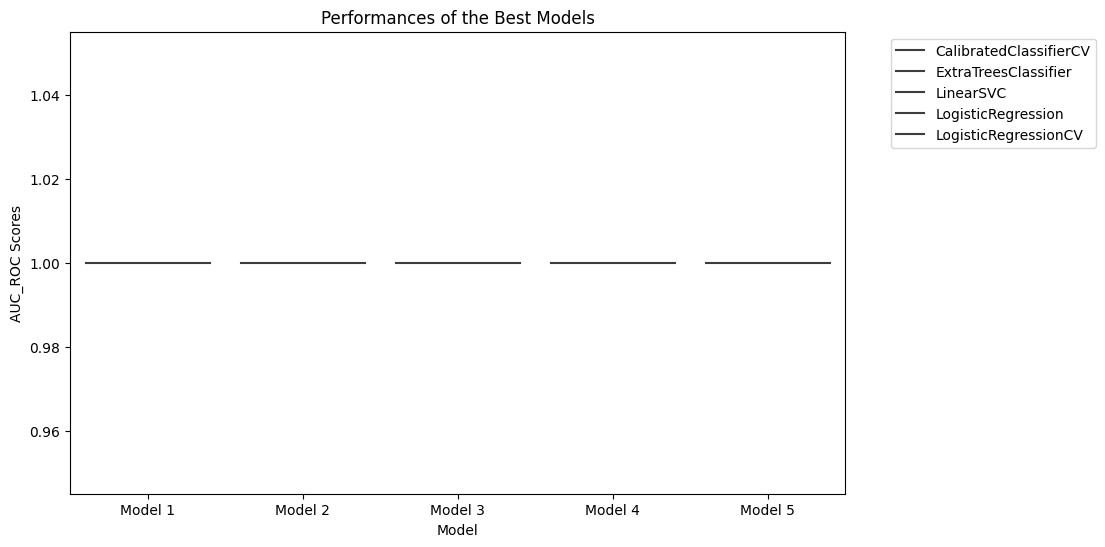

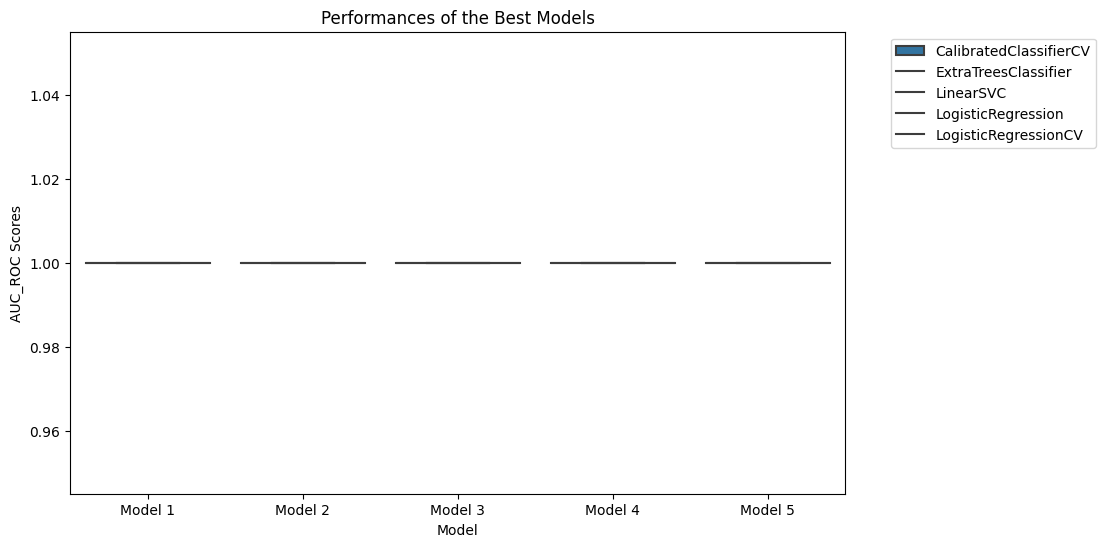

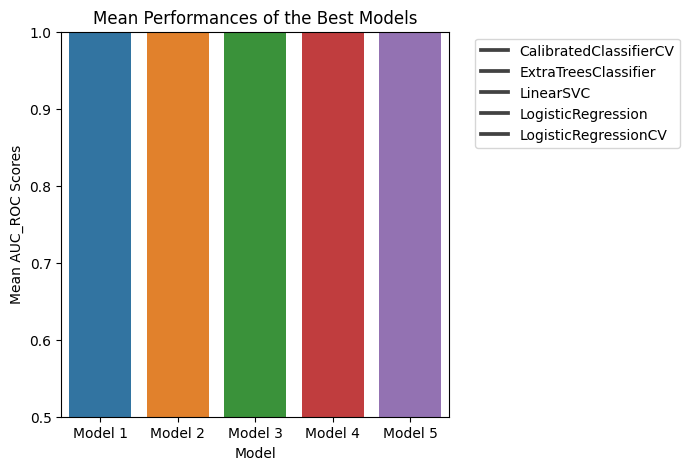

C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:222: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:222: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


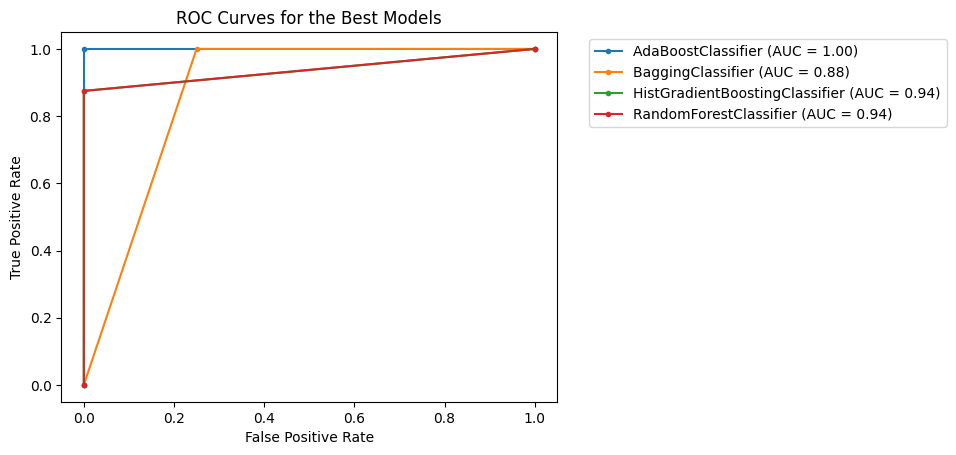

In [54]:
#run_functions_on_models(estimators, model, model_evaluation)
visualize_best_models(estimators, X_train, y_train)
plot_roc_curves_best_models(estimators, X_train, y_train, X_test, y_test)

In [17]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your data in X (features) and y (labels/targets)

# Split the data into training and test sets


# Create an instance of the HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9166666666666666


C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Accuracy: 1.0


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasClassifier

# Define the function to create the AlexNet model
def create_alexnet_model():
    model = Sequential()
    model.add(Conv1D(96, 11, strides=4, activation='relu', input_shape=(60, 1)))
    model.add(MaxPooling1D(3, strides=2))
    model.add(Conv1D(256, 5, activation='relu'))
    model.add(MaxPooling1D(3, strides=2))
    model.add(Conv1D(384, 3, activation='relu'))
    model.add(Conv1D(384, 3, activation='relu'))
    model.add(Conv1D(256, 3, activation='relu'))
    model.add(MaxPooling1D(3, strides=2))
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Wrap the Keras model with KerasClassifier
model = KerasClassifier(build_fn=create_alexnet_model, epochs=12, batch_size=28)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Fit the model
model.fit(X_train, y_train)

# Predict probabilities for ROC curve
y_prob = model.predict_proba(X_test)

# Extract positive class probabilities for ROC curve
y_prob_positive = y_prob[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_positive)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Predict labels for test set
y_pred_test = model.predict(X_test)

# Calculate performance metrics
confusion = confusion_matrix(y_test, y_pred_test)
classification = classification_report(y_test, y_pred_test)

# Print performance metrics
print('Confusion Matrix:')
print(confusion)
print('\nClassification Report:')
print(classification)

# Average test accuracy across all folds
cv_accuracy = np.mean(cv_scores)

print('Cross-Validation Accuracy:', cv_accuracy)


C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error in

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py", line 1494, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py", line 762, in fit
    self._fit(
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py", line 918, in _fit
    X, y = self._initialize(X, y)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py", line 855, in _initialize
    self.model_ = self._build_keras_model()
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py", line 431, in _build_keras_model
    model = final_build_fn(**build_params)
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_20900\351538499.py", line 19, in create_alexnet_model
    model.add(MaxPooling1D(3, strides=2))
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_6" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_6/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_6/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_6" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py", line 1494, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py", line 762, in fit
    self._fit(
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py", line 918, in _fit
    X, y = self._initialize(X, y)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py", line 855, in _initialize
    self.model_ = self._build_keras_model()
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py", line 431, in _build_keras_model
    model = final_build_fn(**build_params)
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_20900\351538499.py", line 19, in create_alexnet_model
    model.add(MaxPooling1D(3, strides=2))
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_8" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_8/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_8/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_8" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py", line 1494, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py", line 762, in fit
    self._fit(
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py", line 918, in _fit
    X, y = self._initialize(X, y)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py", line 855, in _initialize
    self.model_ = self._build_keras_model()
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py", line 431, in _build_keras_model
    model = final_build_fn(**build_params)
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_20900\351538499.py", line 19, in create_alexnet_model
    model.add(MaxPooling1D(3, strides=2))
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_10" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_10/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_10/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_10" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py", line 1494, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py", line 762, in fit
    self._fit(
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py", line 918, in _fit
    X, y = self._initialize(X, y)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py", line 855, in _initialize
    self.model_ = self._build_keras_model()
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py", line 431, in _build_keras_model
    model = final_build_fn(**build_params)
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_20900\351538499.py", line 19, in create_alexnet_model
    model.add(MaxPooling1D(3, strides=2))
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_12" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_12/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_12/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_12" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py", line 1494, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py", line 762, in fit
    self._fit(
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py", line 918, in _fit
    X, y = self._initialize(X, y)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py", line 855, in _initialize
    self.model_ = self._build_keras_model()
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py", line 431, in _build_keras_model
    model = final_build_fn(**build_params)
  File "C:\Users\akhil\AppData\Local\Temp\ipykernel_20900\351538499.py", line 19, in create_alexnet_model
    model.add(MaxPooling1D(3, strides=2))
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 6523, in pool2d
    x = tf.compat.v1.nn.max_pool(
ValueError: Exception encountered when calling layer "max_pooling1d_14" (type MaxPooling1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling1d_14/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_14/ExpandDims)' with input shapes: [?,2,1,256].

Call arguments received by layer "max_pooling1d_14" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 2, 256), dtype=float32)


In [22]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import (Conv1D, Dense, Dropout, Flatten,MaxPooling1D, Reshape)
from tensorflow.keras.models import Sequential
import keras_tuner as kt
def build_model(X_train, y_train):
    """
    Build and compile the model using hyperparameters found through hyperparameter tuning.

    This function performs hyperparameter tuning using Keras Tuner to find the optimal
    hyperparameters for the model. It creates a model with a specified architecture and
    compiles it with the best hyperparameters. The hyperparameter search space includes
    the number of units in the first dense layer and the learning rate for the optimizer.

    Args:
        X_train (numpy.ndarray): Input training data.
        y_train (numpy.ndarray): Target training data.

    Returns:
        keras.models.Sequential: Compiled model with the optimal hyperparameters.
    """
    def model_builder(hp):
        model = keras.Sequential()
        model.add(Conv1D(filters=64, kernel_size=2, activation='relu',
                         input_shape=(X_train.shape[1], 1)))

        # Tune the number of units in the first Dense layer
        hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
        model.add(keras.layers.Dense(units=hp_units, activation='relu'))
        model.add(keras.layers.Dense(10))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Flatten())
        model.add(Dense(2, activation='sigmoid'))

        # Tune the learning rate for the optimizer
        hp_learning_rate = hp.Choice(
            'learning_rate', values=[1e-2, 1e-3, 1e-4])

        model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

        return model

    tuner = kt.Hyperband(model_builder,
                         objective='accuracy',
                         max_epochs=50,
                         factor=3,
                         overwrite=True)

    tuner.search(X_train, y_train, epochs=50)

    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

    print(f"""
    The hyperparameter search is complete. The optimal number of units in the first densely-connected
    layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
    is {best_hps.get('learning_rate')}.
    """)

    model = tuner.hypermodel.build(best_hps)
    model.summary()
    #Visualize the model
    keras.utils.plot_model(model, show_shapes=True,
                           show_layer_activations=True)

    return model


def plot_history(history):
    """
    Plot the accuracy and loss history of a trained model.

    This function takes the training history of a model and creates two plots: one for the
    accuracy and one for the loss. The plots show the training and validation performance
    over the epochs.

    Args:
        history (keras.callbacks.History): Training history of the model.
    """
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()